In [1]:
import numpy as np
import pandas as pd
from scipy import ndimage
from skimage import io, filters, morphology
import matplotlib.pyplot as plt
%matplotlib inline
import timeit
import tifffile
import zipfile
import tqdm
import analysis

In [2]:
def calculate_lifetimes(neuron):
    """
    This function takes a 4D array as an input and calculates the lifetimes of the pixels over time. 
    The array should only contain the pixels that are part of the dendrite.
    It first binarizes the image then multiplies the previous to the current volume to see if the pixel survived.
    Afterwards it adds the volume of the binary image of the current index to the last volume, thereby increasing
    the count of each pixel that is still "alive".
    
    Parameter:
    ------------------
    neuron: 4D array of dendrite
    
    Returns:
    -------------------
    
    neuron_lifetimes: 4D array of the same shape as the input array but with pixel values as their lifetimes in every stack.
    """
    
    neuron_lifetimes = np.empty(neuron.shape)
    neuron_binary = neuron.copy()
    
    neuron_binary[neuron_binary > 0] = 1
    neuron_lifetimes[0] = neuron_binary[0]
    
    for i in tqdm.tqdm(range(1,neuron_binary.shape[0])):
        current_lifetimes = (neuron_binary[i]*neuron_lifetimes[i-1]) + neuron_binary[i]
        neuron_lifetimes[i] = current_lifetimes
        
    return neuron_lifetimes

In [43]:
path_mask1 = '/Users/hoermann/Desktop/TLI_project/Analysis/Neurons_ready/Masks/211104_P36_N1_JESUS_mask.tif'
path_neuron1 = '/Users/hoermann/Desktop/TLI_project/Analysis/Neurons_ready/Neurons/211104_P36_N1_5D.tif'

path_mask2 = '/Users/hoermann/Desktop/TLI_project/Analysis/Neurons_ready/Masks/211107_P36_N1_GFP_JESUS_label.tif'
path_neuron2 = '/Users/hoermann/Desktop/TLI_project/Analysis/Neurons_ready/Neurons/211107_P36_N1_5D.tif'

path_mask3 = '/Users/hoermann/Desktop/TLI_project/Analysis/Neurons_ready/Masks/211113_P36_N1_mask3_JESUS.tif'
path_neuron3 = '/Users/hoermann/Desktop/TLI_project/Analysis/Neurons_ready/Neurons/211113_P36_N1_5D.tif'

path_mask4 = '/Users/hoermann/Desktop/TLI_project/Analysis/Neurons_ready/Masks/211121_P36.5_N3_GFP_JESUS_label.tif'
path_neuron4 = '/Users/hoermann/Desktop/TLI_project/Analysis/Neurons_ready/Neurons/211121_P36.5_N3_5D.tif'

path_mask5 = '/Users/hoermann/Desktop/TLI_project/Analysis/Neurons_ready/Masks/220209_P36_N2_mask_flipV_JESUS.tif'
path_neuron5 = '/Users/hoermann/Desktop/TLI_project/Analysis/Neurons_ready/Neurons/220209_P36_N2_5D_flipV.tif'

path_mask6 = '/Users/hoermann/Desktop/TLI_project/Analysis/Neurons_ready/Masks/211104_P36_N2_GFP_JESUS_new_masked.tif'
path_neuron6 = '/Users/hoermann/Desktop/TLI_project/Analysis/Neurons_ready/Neurons/211104_P36_N2_5D.tif'

In [44]:
test_mask1 = tifffile.imread(path_mask1)
test_mask2 = tifffile.imread(path_mask2)
test_mask3 = tifffile.imread(path_mask3)
test_mask4 = tifffile.imread(path_mask4)
test_mask5 = tifffile.imread(path_mask5)
test_mask6 = tifffile.imread(path_mask6)

test_neuron1 = tifffile.imread(path_neuron1)
test_neuron2 = tifffile.imread(path_neuron2)
test_neuron3 = tifffile.imread(path_neuron3)
test_neuron4 = tifffile.imread(path_neuron4)
test_neuron5 = tifffile.imread(path_neuron5)
test_neuron6 = tifffile.imread(path_neuron6)

In [45]:
neuron1 = test_mask1 * test_neuron1[:,:,1,:,:]
neuron2 = test_mask2 * test_neuron2[:,:,1,:,:]
neuron3 = test_mask3 * test_neuron3[:,:,1,:,:]
neuron4 = test_mask4 * test_neuron4[:,:,1,:,:]
neuron5 = test_mask5 * test_neuron5[:,:,1,:,:]
neuron6 = test_mask6 * test_neuron6[:,:,1,:,:]

In [47]:
volume1 = np.zeros(neuron1.shape[0])
volume2 = np.zeros(neuron2.shape[0])
volume3 = np.zeros(neuron3.shape[0])
volume4 = np.zeros(neuron4.shape[0])
volume5 = np.zeros(neuron5.shape[0])
volume6 = np.zeros(neuron6.shape[0])

for i in range(neuron1.shape[0]):
    volume1[i] = np.count_nonzero(neuron1[i,:,:,:])
    
for i in range(neuron2.shape[0]):
    volume2[i] = np.count_nonzero(neuron2[i,:,:,:])

for i in range(neuron3.shape[0]):
    volume3[i] = np.count_nonzero(neuron3[i,:,:,:])
    
for i in range(neuron4.shape[0]):
    volume4[i] = np.count_nonzero(neuron4[i,:,:,:])
    
for i in range(neuron5.shape[0]):
    volume5[i] = np.count_nonzero(neuron5[i,:,:,:])
    
for i in range(neuron6.shape[0]):
    volume6[i] = np.count_nonzero(neuron6[i,:,:,:])
    

In [49]:
volume1 = volume1/volume1.max()
volume2 = volume2/volume2.max()
volume3 = volume3/volume3.max()
volume4 = volume4/volume4.max()
volume5 = volume5/volume5.max()
volume6 = volume6/volume6.max()

In [50]:
timepoints = np.array(range(120))
timepoints = timepoints/4
timepoints = timepoints + 36

In [51]:
neurons = pd.DataFrame()

In [52]:
neurons['timepoints'] = timepoints

In [53]:
neurons['neuron1'] = 0
neurons['neuron2'] = 0
neurons['neuron3'] = 0
neurons['neuron4'] = 0
neurons['neuron5'] = 0
neurons['neuron6'] = 0

In [55]:
print(
    len(test_neuron1), 
    len(test_neuron2), 
    len(test_neuron3), 
    len(test_neuron4),
    len(test_neuron5), 
    len(test_neuron6)
)

89 92 86 92 88 89


(array([2.40000e+01, 1.65000e+02, 6.66000e+02, 2.61100e+03, 1.02480e+04,
        3.66430e+04, 9.13060e+04, 1.66034e+05, 2.52745e+05, 3.47683e+05,
        4.47749e+05, 5.37872e+05, 6.05310e+05, 6.45904e+05, 6.44806e+05,
        6.52745e+05, 6.37859e+05, 6.19874e+05, 5.99371e+05, 5.81272e+05,
        5.61772e+05, 5.40054e+05, 5.20280e+05, 5.01877e+05, 4.81463e+05,
        4.62311e+05, 4.40770e+05, 4.21464e+05, 4.02718e+05, 3.76207e+05,
        3.65952e+05, 3.49006e+05, 3.33262e+05, 3.16829e+05, 3.00859e+05,
        2.85830e+05, 2.71605e+05, 2.56806e+05, 2.43691e+05, 2.30293e+05,
        2.17872e+05, 2.06261e+05, 1.94429e+05, 1.83352e+05, 1.68128e+05,
        1.61361e+05, 1.51204e+05, 1.41249e+05, 1.31475e+05, 1.22551e+05,
        1.13108e+05, 1.04583e+05, 9.64500e+04, 8.88330e+04, 8.14540e+04,
        7.40540e+04, 6.69890e+04, 6.01170e+04, 5.36720e+04, 4.65230e+04,
        4.12300e+04, 3.54750e+04, 2.98940e+04, 2.49360e+04, 2.01970e+04,
        1.63990e+04, 1.31990e+04, 1.05010e+04, 8.58

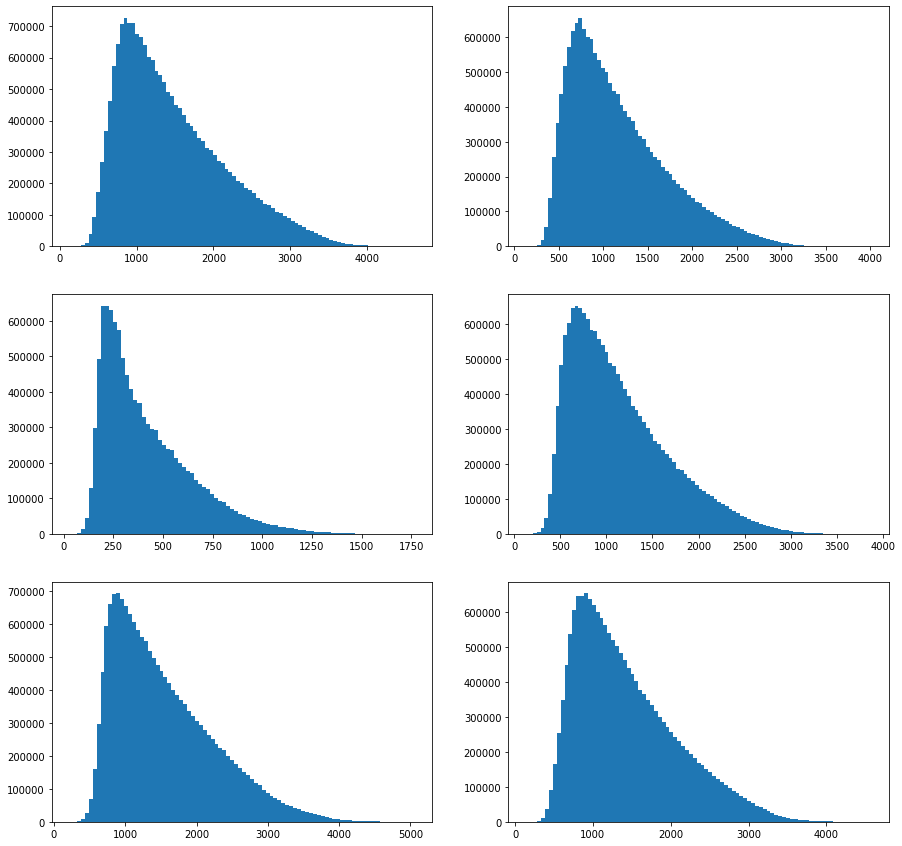

In [56]:
fig, ax = plt.subplots(3,2, figsize=(15,15))

ax[0,0].hist(np.ravel(neuron1)[np.ravel(neuron1)>0]-32768, bins=neuron1.shape[0])
ax[0,1].hist(np.ravel(neuron2)[np.ravel(neuron2)>0]-32768, bins=neuron2.shape[0])
ax[1,0].hist(np.ravel(neuron3)[np.ravel(neuron3)>0]-32768, bins=neuron3.shape[0])
ax[1,1].hist(np.ravel(neuron4)[np.ravel(neuron4)>0]-32768, bins=neuron4.shape[0])
ax[2,0].hist(np.ravel(neuron5)[np.ravel(neuron5)>0]-32768, bins=neuron5.shape[0])
ax[2,1].hist(np.ravel(neuron6)[np.ravel(neuron6)>0]-32768, bins=neuron6.shape[0])

In [57]:
neurons.loc[:len(volume1)-1,('neuron1')] = volume1
neurons.loc[:len(volume2)-1,('neuron2')] = volume2
neurons.loc[:len(volume3)-1,('neuron3')] = volume3
neurons.loc[2:len(volume4)+1,('neuron4')] = volume4
neurons.loc[:len(volume5)-1,('neuron5')] = volume5
neurons.loc[:len(volume6)-1,('neuron6')] = volume6

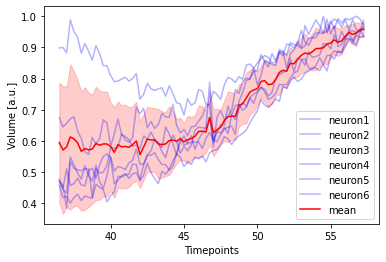

In [86]:
plt.plot(neurons.loc[2:85,'timepoints'], neurons.loc[2:85,'neuron1'], alpha=0.3, color='b')
plt.plot(neurons.loc[2:85,'timepoints'], neurons.loc[2:85,'neuron2'], alpha=0.3, color='b')
plt.plot(neurons.loc[2:85,'timepoints'], neurons.loc[2:85,'neuron3'], alpha=0.3, color='b')
plt.plot(neurons.loc[2:85,'timepoints'], neurons.loc[2:85,'neuron4'], alpha=0.3, color='b')
plt.plot(neurons.loc[2:85,'timepoints'], neurons.loc[2:85,'neuron5'], alpha=0.3, color='b')
plt.plot(neurons.loc[2:85,'timepoints'], neurons.loc[2:85,'neuron6'], alpha=0.3, color='b')
y_mean = neurons.loc[2:85, neurons.columns[1:6]].mean(axis=1)
plt.plot(neurons.loc[2:85,'timepoints'], y_mean, color='r')
y_err = neurons.loc[2:85, neurons.columns[1:6]].std(axis=1)
plt.fill_between(neurons.loc[2:85,'timepoints'], y1=y_mean+y_err, y2=y_mean-y_err, alpha=0.2, color='r')

plt.ylabel('Volume [a.u.]')
plt.xlabel('Timepoints')
plt.legend(['neuron1', 'neuron2', 'neuron3', 'neuron4', 'neuron5', 'neuron6', 'mean'])
plt.savefig(fname='/Users/hoermann/Desktop/TLI_project/Analysis/Growth/Volume.pdf')

In [61]:
for i in neurons.columns[1:7]:
    neurons[i + '_growth'] = neurons[i].diff()

neurons['average_growth'] = neurons.loc[:, neurons.columns[7:]].mean(axis=1)

In [62]:
neurons[0:90]

,timepoints,neuron1,neuron2,neuron3,neuron4,neuron5,neuron6,neuron1_growth,neuron2_growth,neuron3_growth,neuron4_growth,neuron5_growth,neuron6_growth,average_growth
84,57.00,0.952676,0.948855,0.991076,0.932313,0.958035,0.953554,0.004917,0.045287,-0.008924,-0.006491,0.015818,-0.003222,0.007897
85,57.25,0.986716,0.962450,0.972951,0.934267,0.935033,0.967397,0.034040,0.013594,-0.018124,0.001954,-0.023002,0.013843,0.003718
86,57.50,0.967908,0.957523,0.000000,0.955158,0.980007,0.978739,-0.018808,-0.004926,-0.972951,0.020891,0.044975,0.011343,-0.153246
87,57.75,0.995652,0.985260,0.000000,0.982209,1.000000,0.987107,0.027744,0.027737,0.000000,0.027051,0.019993,0.008367,0.018482
88,58.00,1.000000,0.980849,0.000000,0.998267,0.000000,0.992822,0.004348,-0.004412,0.000000,0.016058,-1.000000,0.005715,-0.163048
89,58.25,0.000000,0.956679,0.000000,0.910860,0.000000,0.000000,-1.000000,-0.024170,0.000000,-0.087406,0.000000,-0.992822,-0.350733


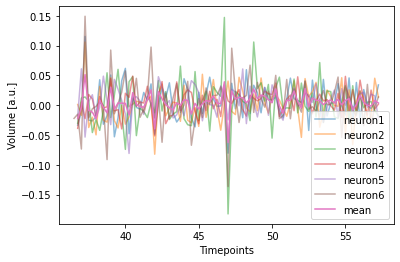

In [63]:
plt.plot(neurons.loc[3:85,'timepoints'], neurons.loc[3:85,'neuron1_growth'], alpha=0.5)
plt.plot(neurons.loc[3:85,'timepoints'], neurons.loc[3:85,'neuron2_growth'], alpha=0.5)
plt.plot(neurons.loc[3:85,'timepoints'], neurons.loc[3:85,'neuron3_growth'], alpha=0.5)
plt.plot(neurons.loc[3:85,'timepoints'], neurons.loc[3:85,'neuron4_growth'], alpha=0.5)
plt.plot(neurons.loc[3:85,'timepoints'], neurons.loc[3:85,'neuron5_growth'], alpha=0.5)
plt.plot(neurons.loc[2:85,'timepoints'], neurons.loc[2:85,'neuron6_growth'], alpha=0.5)
plt.plot(neurons.loc[3:85,'timepoints'], neurons.loc[3:85, 'average_growth'])
plt.ylabel('Volume [a.u.]')
plt.xlabel('Timepoints')
plt.legend(['neuron1', 'neuron2', 'neuron3', 'neuron4', 'neuron5', 'neuron6', 'mean'])
plt.savefig(fname='/Users/hoermann/Desktop/TLI_project/Analysis/Growth/Growth_rate.pdf')

In [64]:
neuron1_lifetimes = calculate_lifetimes(neuron1)
neuron2_lifetimes = calculate_lifetimes(neuron2)
neuron3_lifetimes = calculate_lifetimes(neuron3)
neuron4_lifetimes = calculate_lifetimes(neuron4)
neuron5_lifetimes = calculate_lifetimes(neuron5)
neuron6_lifetimes = calculate_lifetimes(neuron6)

100%|███████████████████████████████████████████| 88/88 [00:07<00:00, 11.44it/s]


(array([2778919., 1486461., 1049910.,  826782.,  682439.,  582749.,
         509114.,  454268.,  410372.,  370865.,  344098.,  322477.,
         304009.,  283751.,  266002.,  251241.,  236474.,  224983.,
         213542.,  205195.,  196084.,  189181.,  181230.,  174333.,
         167766.,  162481.,  157232.,  151791.,  146630.,  139885.,
         134643.,  130311.,  126628.,  122244.,  118873.,  115790.,
         112622.,  109029.,  106176.,  102593.,  100082.,   96714.,
          93960.,   91559.,   88299.,   86170.,   83341.,   80799.,
          78079.,   76407.,   74868.,   73020.,   71748.,   69545.,
          67663.,   64838.,   62875.,   61640.,   60808.,   59315.,
          57699.,   55971.,   54942.,   52884.,   51530.,   50173.,
          48689.,   47795.,   46783.,   45969.,   44699.,   42726.,
          41500.,   39995.,   37268.,   33860.,   32528.,   29714.,
          28833.,   27751.,   26547.,   24312.,   23270.,   22699.,
          18239.,   17372.,   16701.,   16231., 

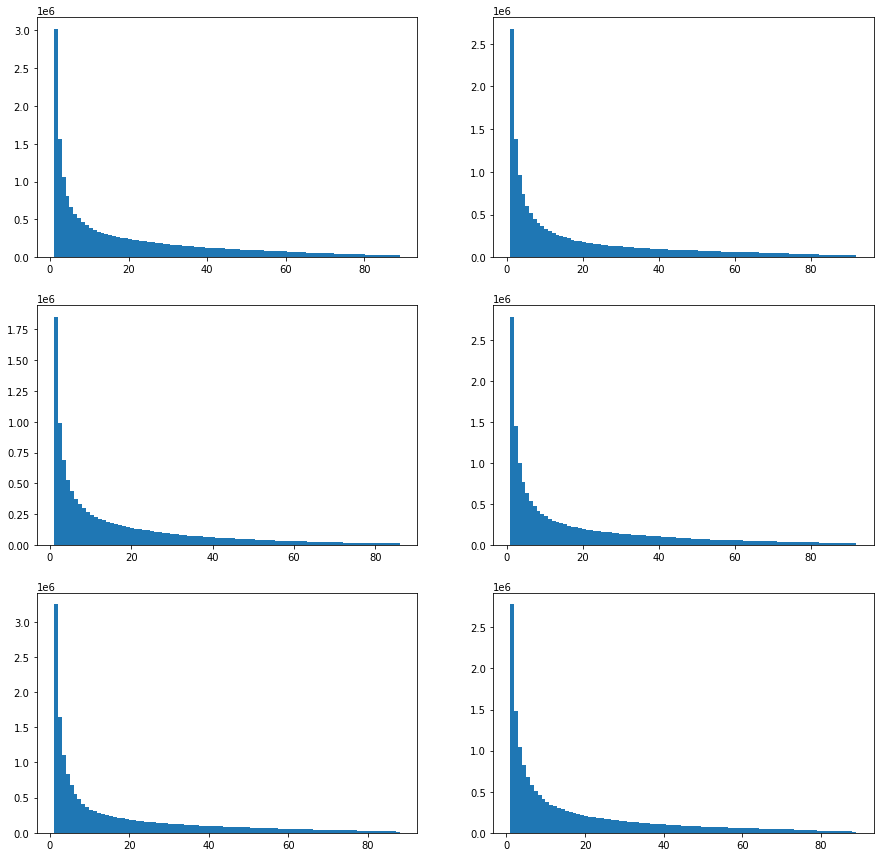

In [65]:
fig, ax = plt.subplots(3,2, figsize=(15,15))

ax[0,0].hist(np.ravel(neuron1_lifetimes)[np.ravel(neuron1_lifetimes)>0], bins=neuron1_lifetimes.shape[0])
ax[0,1].hist(np.ravel(neuron2_lifetimes)[np.ravel(neuron2_lifetimes)>0], bins=neuron2_lifetimes.shape[0])
ax[1,0].hist(np.ravel(neuron3_lifetimes)[np.ravel(neuron3_lifetimes)>0], bins=neuron3_lifetimes.shape[0])
ax[1,1].hist(np.ravel(neuron4_lifetimes)[np.ravel(neuron4_lifetimes)>0], bins=neuron4_lifetimes.shape[0])
ax[2,0].hist(np.ravel(neuron5_lifetimes)[np.ravel(neuron5_lifetimes)>0], bins=neuron5_lifetimes.shape[0])
ax[2,1].hist(np.ravel(neuron6_lifetimes)[np.ravel(neuron6_lifetimes)>0], bins=neuron6_lifetimes.shape[0])

In [67]:
neuron1_DGI = analysis.calculate_DGI(entry_point=[0, 27, 234, 181], neuron=neuron1)
neuron2_DGI = analysis.calculate_DGI(entry_point=[0, 26, 255, 203], neuron=neuron2)
neuron3_DGI = analysis.calculate_DGI(entry_point=[0, 28, 172, 193], neuron=neuron3)
neuron4_DGI = analysis.calculate_DGI(entry_point=[0, 36, 178, 184], neuron=neuron4)
neuron5_DGI = analysis.calculate_DGI(entry_point=[0, 22, 216, 105], neuron=neuron5)
neuron6_DGI = analysis.calculate_DGI(entry_point=[0, 45, 232, 194], neuron=neuron6)

In [68]:
neuron1_DGI.index = timepoints[:len(neuron1_DGI)]
neuron2_DGI.index = timepoints[:len(neuron2_DGI)]
neuron3_DGI.index = timepoints[:len(neuron3_DGI)]
neuron4_DGI.index = timepoints[:len(neuron4_DGI)]
neuron5_DGI.index = timepoints[:len(neuron5_DGI)]
neuron6_DGI.index = timepoints[:len(neuron6_DGI)]


In [69]:
mean_DGI = np.mean([neuron1_DGI['DGI'],
                    neuron2_DGI['DGI'],
                    neuron3_DGI['DGI'],
                    neuron4_DGI['DGI'],
                    neuron5_DGI['DGI'],
                    neuron6_DGI['DGI']
                   ]
                  )

/opt/anaconda3/envs/ants/lib/python3.9/site-packages/numpy/core/_methods.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


In [70]:
mean_DGI[:-6]

array([0.32026618, 0.33823853, 0.3088304 , 0.35029484, 0.39349994,
       0.39294848, 0.40855482, 0.43013369, 0.46997509, 0.44056453,
       0.39303771, 0.37335347, 0.42352173, 0.4394946 , 0.50077403,
       0.5013625 , 0.51278373, 0.50958176, 0.53898267, 0.49431581,
       0.48651563, 0.46979389, 0.45081588, 0.48743793, 0.46807627,
       0.49191428, 0.47455803, 0.4483738 , 0.46134183, 0.45367071,
       0.42780824, 0.34433691, 0.36668187, 0.39986908, 0.43289776,
       0.44006227, 0.47843365, 0.48208706, 0.49616676, 0.5057425 ,
       0.49860657, 0.54523155, 0.51121203, 0.47716024, 0.50842486,
       0.49186608, 0.48407257, 0.49898632, 0.49127434, 0.51104208,
       0.49800045, 0.49585508, 0.48938481, 0.47538294, 0.49202444,
       0.50688729, 0.50156292, 0.49427157, 0.48459818, 0.50940353,
       0.50147533, 0.50176508, 0.4928878 , 0.50239769, 0.47815833,
       0.48241379, 0.48672062, 0.49294223, 0.48223368, 0.462183  ,
       0.47737492, 0.4789797 , 0.48821372, 0.48364963, 0.47657

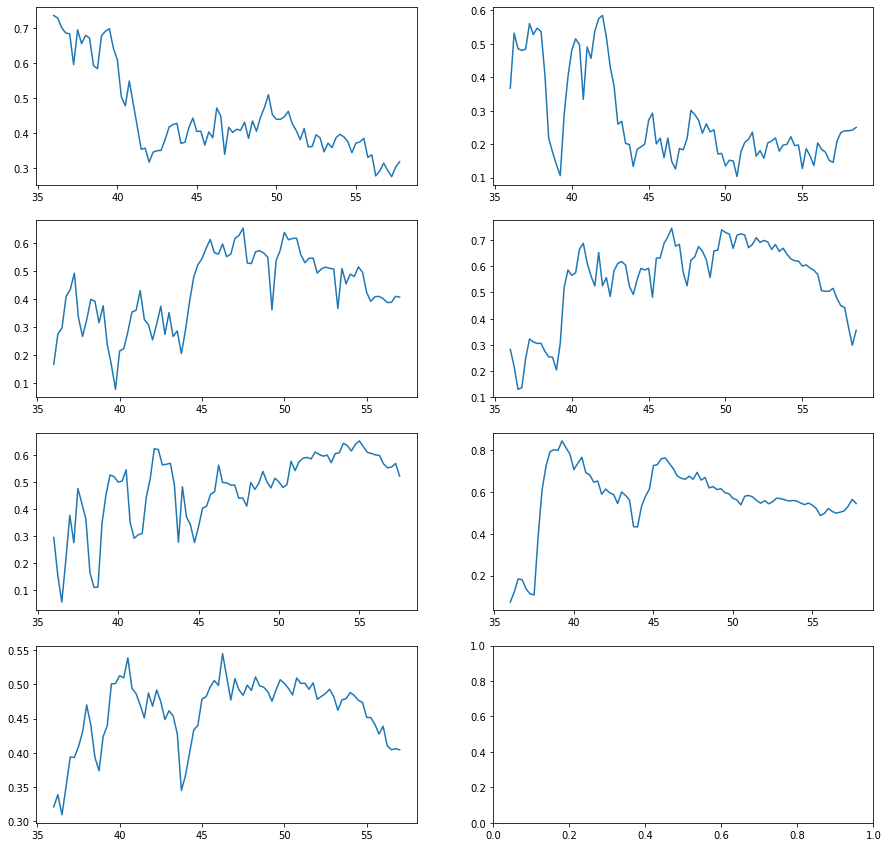

In [73]:
fig, ax = plt.subplots(4,2, figsize=(15,15))

ax[0,0].plot(timepoints[:len(neuron1_DGI)], neuron1_DGI['DGI'])
ax[0,1].plot(timepoints[:len(neuron2_DGI)], neuron2_DGI['DGI'])
ax[1,0].plot(timepoints[:len(neuron3_DGI)], neuron3_DGI['DGI'])
ax[1,1].plot(timepoints[:len(neuron4_DGI)], neuron4_DGI['DGI'])
ax[2,0].plot(timepoints[:len(neuron5_DGI)], neuron5_DGI['DGI'])
ax[2,1].plot(timepoints[:len(neuron6_DGI)], neuron6_DGI['DGI'])

ax[3,0].plot(timepoints[:len(mean_DGI[:-6])], mean_DGI[:-6])


In [74]:
neuron1_stable = neuron1_lifetimes.copy()
neuron1_stable[(neuron1_stable < 4) * (neuron1_stable > 0)] = 1
neuron1_stable[neuron1_stable > 3] = 2
neuron1_stable = np.int16(neuron1_stable)

neuron2_stable = neuron2_lifetimes.copy()
neuron2_stable[(neuron2_stable < 4) * (neuron2_stable > 0)] = 1
neuron2_stable[neuron2_stable > 3] = 2
neuron2_stable = np.int16(neuron2_stable)

neuron3_stable = neuron3_lifetimes.copy()
neuron3_stable[(neuron3_stable < 4) * (neuron3_stable > 0)] = 1
neuron3_stable[neuron3_stable > 3] = 2
neuron3_stable = np.int16(neuron3_stable)

neuron4_stable = neuron4_lifetimes.copy()
neuron4_stable[(neuron4_stable < 4) * (neuron4_stable > 0)] = 1
neuron4_stable[neuron4_stable > 3] = 2
neuron4_stable = np.int16(neuron4_stable)

neuron5_stable = neuron5_lifetimes.copy()
neuron5_stable[(neuron5_stable < 4) * (neuron5_stable > 0)] = 1
neuron5_stable[neuron5_stable > 3] = 2
neuron5_stable = np.int16(neuron5_stable)

neuron6_stable = neuron6_lifetimes.copy()
neuron6_stable[(neuron6_stable < 4) * (neuron6_stable > 0)] = 1
neuron6_stable[neuron6_stable > 3] = 2
neuron6_stable = np.int16(neuron6_stable)

In [26]:
# tifffile.imwrite(file='/Users/hoermann/Desktop/test_lifetimes.tif', data=neuron1_stable, **{'imagej':'TZYX', 'bigtiff':True})
# tifffile.imwrite(file='/Users/hoermann/Desktop/test_all.tif', data=neuron1_all, **{'imagej':'TZYX', 'bigtiff':True})

In [75]:
neuron1_trans = neuron1_stable == 1
neuron2_trans = neuron2_stable == 1
neuron3_trans = neuron3_stable == 1
neuron4_trans = neuron4_stable == 1
neuron5_trans = neuron5_stable == 1
neuron6_trans = neuron6_stable == 1

In [78]:
neuron1_trans_DGI = analysis.calculate_DGI(entry_point=[0, 27, 234, 181], neuron=neuron1_trans)
neuron2_trans_DGI = analysis.calculate_DGI(entry_point=[0, 26, 255, 203], neuron=neuron2_trans)
neuron3_trans_DGI = analysis.calculate_DGI(entry_point=[0, 28, 172, 193], neuron=neuron3_trans)
neuron4_trans_DGI = analysis.calculate_DGI(entry_point=[0, 36, 178, 184], neuron=neuron4_trans)
neuron5_trans_DGI = analysis.calculate_DGI(entry_point=[0, 22, 216, 105], neuron=neuron5_trans)
neuron6_trans_DGI = analysis.calculate_DGI(entry_point=[0, 45, 232, 194], neuron=neuron6_trans)

In [79]:
# mean_trans_DGI = np.mean([neuron1_trans_DGI['DGI'],
#                           neuron2_trans_DGI['DGI'],
#                           neuron3_trans_DGI['DGI'],
#                           neuron4_trans_DGI['DGI'],
#                           neuron5_trans_DGI['DGI']]
#                         )

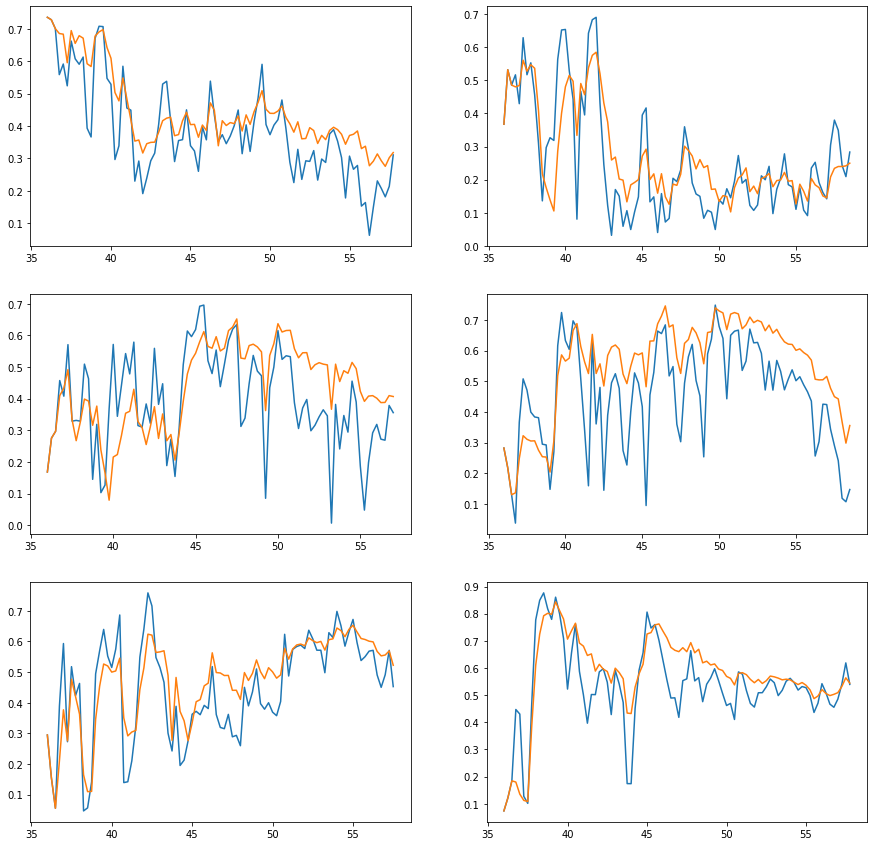

In [80]:
fig, ax = plt.subplots(3,2, figsize=(15,15))

ax[0,0].plot(timepoints[:len(neuron1_trans_DGI)], neuron1_trans_DGI['DGI'])
ax[0,0].plot(timepoints[:len(neuron1_DGI)], neuron1_DGI['DGI'])

ax[0,1].plot(timepoints[:len(neuron2_trans_DGI)], neuron2_trans_DGI['DGI'])
ax[0,1].plot(timepoints[:len(neuron2_DGI)], neuron2_DGI['DGI'])

ax[1,0].plot(timepoints[:len(neuron3_trans_DGI)], neuron3_trans_DGI['DGI'])
ax[1,0].plot(timepoints[:len(neuron3_DGI)], neuron3_DGI['DGI'])

ax[1,1].plot(timepoints[:len(neuron4_trans_DGI)], neuron4_trans_DGI['DGI'])
ax[1,1].plot(timepoints[:len(neuron4_DGI)], neuron4_DGI['DGI'])

ax[2,0].plot(timepoints[:len(neuron5_trans_DGI)], neuron5_trans_DGI['DGI'])
ax[2,0].plot(timepoints[:len(neuron5_DGI)], neuron5_DGI['DGI'])

ax[2,1].plot(timepoints[:len(neuron6_trans_DGI)], neuron6_trans_DGI['DGI'])
ax[2,1].plot(timepoints[:len(neuron6_DGI)], neuron6_DGI['DGI'])

In [32]:
neuron1_bin = np.int16(neuron1_stable > 0)
neuron2_bin = np.int16(neuron2_stable > 0)
neuron3_bin = np.int16(neuron3_stable > 0)
neuron4_bin = np.int16(neuron4_stable > 0)
neuron5_bin = np.int16(neuron5_stable > 0)

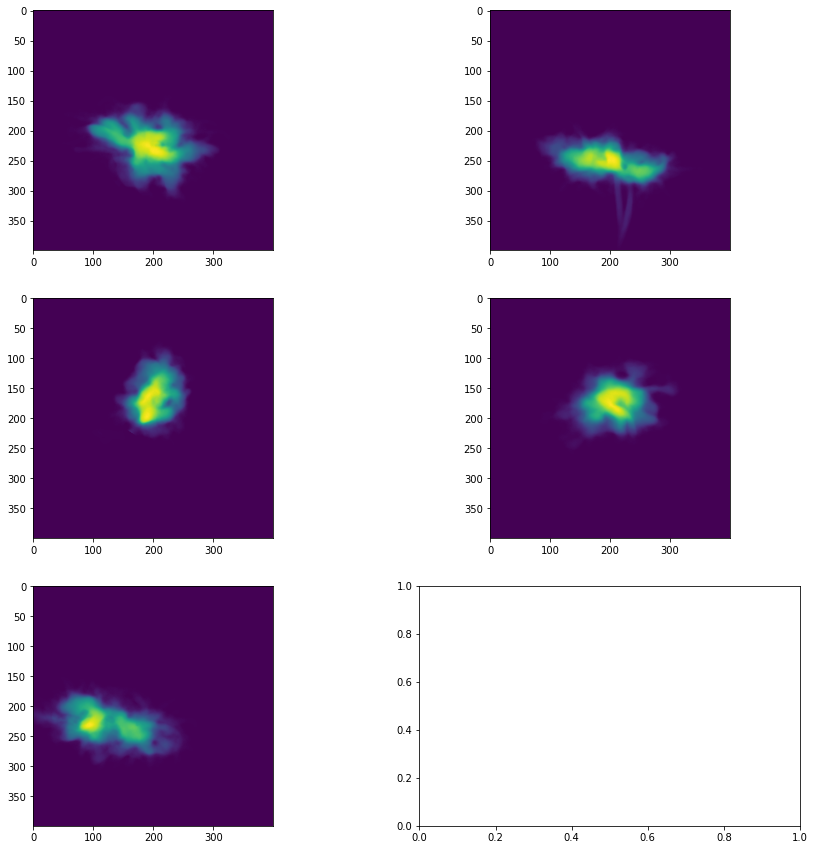

In [42]:
fig, ax = plt.subplots(3,2, figsize=(15,15))

ax[0,0].imshow(neuron1_bin.sum(axis=1).sum(axis=0))
ax[0,1].imshow(neuron2_bin.sum(axis=1).sum(axis=0))
ax[1,0].imshow(neuron3_bin.sum(axis=1).sum(axis=0))
ax[1,1].imshow(neuron4_bin.sum(axis=1).sum(axis=0))
ax[2,0].imshow(neuron5_bin.sum(axis=1).sum(axis=0))

In [ ]:
column_rois = read_roi_zip('/Users/hoermann/Downloads/211011_neuron1_columns2.zip')

In [ ]:
rois_df = pd.DataFrame(columns=['x', 'y', 'roi'])

In [ ]:
for i in range(len(column_rois.keys())):
    roi = list(column_rois.keys())[i]
    roi_df = pd.DataFrame(columns=['x', 'y', 'roi'])
    roi_df['x'] = column_rois[roi]['x']
    roi_df['y'] = column_rois[roi]['y']
    roi_df['roi'] = [roi] * len(column_rois[roi]['x'])
    rois_df = rois_df.append(roi_df)

In [ ]:
rois_df['round_x'] = np.round(rois_df['x'])
rois_df['round_y'] = np.round(rois_df['y'])

In [ ]:
np.unique(rois_df.roi)

In [ ]:
rois_image = np.zeros((1024, 1024))

In [ ]:
for i in np.unique(rois_df.roi):
    for j in tqdm.tqdm(range(len(rois_df.roi[rois_df.roi == i]))):
        x = rois_df.x[rois_df.roi == str(i)][j]
        y = rois_df.y[rois_df.roi == str(i)][j]
        rois_image[int(x), int(y)] = 255

In [ ]:
io.imshow(rois_image)

In [ ]:
test = io.imread('/Users/hoermann/Desktop/211011_neuron1_columns.tif')

In [ ]:
test_label = ndimage.label(test)

In [ ]:
test_label

In [ ]:
rois_df = pd.DataFrame(columns=['x', 'y', 'roi'])

In [ ]:
for i in range(1, test_label[0].max()+1):
    indices = np.argwhere(test_label[0] == i)
    roi_df = pd.DataFrame(columns=['x', 'y', 'roi'])
    roi_df['x'] = indices[:,1]
    roi_df['y'] = indices[:,2]
    roi_df['roi'] = ['roi_'+str(i)] * len(indices)
    rois_df = rois_df.append(roi_df)